In [6]:
import os
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sep
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from matplotlib import rcParams
from matplotlib.patches import Ellipse

# from tkinter import Tcl

Sarting with simple elipticy measurements - taken from https://sextractor.readthedocs.io/en/latest/Position.html#id3

Elipticiy = 1-B/A

A and B are parameters given by the output of SEP.extract on an image. 

In [7]:
def open_multiple_fits_images(filepath):
    final_list = []
    final_image_data = []
    hdr_list = []
    for i in range(len(filepath)):
        # tmp = get_pkg_data_filename(f'{filepath[i]}')
        final_list.append(filepath[i])
        tmp_image_data, tmp_hdr = fits.getdata(filepath[i], ext=0, header=True)
        final_image_data.append(tmp_image_data)
        hdr_list.append(tmp_hdr)
        # tmp_image_data.clear()
        # tmp_hdr.clear()
    return final_list, final_image_data, hdr_list

In [8]:
def open_fits_as_file_list(directorypath, extension, extension2=""):
    count = 0
    fileList = []
    for dirname, dirnames, filenames in os.walk(directorypath):
        for filename in filenames:
            if filename.startswith(f"{extension}"):
                if filename.endswith(f"{extension2}.fits"):
                    fileList.append(f"{dirname}/{filename}")
                    count = count + 1

    return Tcl().call("lsort", "-dict", fileList)

In [9]:
def extract_multiple_images(corrected_data_list, thresh, minarea=50):
    corrected_data_list_new_order = []
    extracted_data = []
    for i in range(len(corrected_data_list[1])):
        corrected_data_new_order_tmp = (
            corrected_data_list[1][i][:2300, 350:1450].byteswap().newbyteorder()
        )

        extracted_data_tmp = sep.extract(
            corrected_data_new_order_tmp,
            thresh=thresh,
            segmentation_map=True,
            minarea=minarea,
        )
        if len(extracted_data_tmp[0]) != 820:
            raise Warning(
                f"Number of galaxies found not equal to 820, the number found is {len(extracted_data_tmp[0])} for threshold of {thresh} and minarea of {minarea}. FileList name: {corrected_data_list[0][i]}"
            )
            return Extracted_data
        extracted_data.append(extracted_data_tmp)
    return extracted_data

In [10]:
def extract_a_b_and_elipticities(extracted_data):
    list_of_lists_a = []
    list_of_lists_b = []
    list_of_lists_elipticity = []
    for i in range(41):
        list_of_a_vals = []
        list_of_b_vals = []
        list_of_elipticities = []
        for j in range(20):
            # print(j+(i*20))
            tmp_a = extracted_data[0]["a"][j + (i * 20)]
            tmp_b = extracted_data[0]["b"][j + (i * 20)]
            tmp_e = 1 - tmp_b / tmp_a
            list_of_a_vals.append(tmp_a)
            list_of_b_vals.append(tmp_b)
            list_of_elipticities.append(tmp_e)

        list_of_lists_a.append(list_of_a_vals)
        list_of_lists_b.append(list_of_b_vals)
        list_of_lists_elipticity.append(list_of_elipticities)
    return list_of_lists_a, list_of_lists_b, list_of_lists_elipticity

In [11]:
def percent(a, b):
    result = abs(((b - a) * 100) / a)

    return result

In [12]:
def calculate_multiple_elipticity_values(extracted_data_list):
    elipticity_values = []
    for i in range(len(extracted_data_list)):
        tmp = extract_a_b_and_elipticities(extracted_data_list[i])
        elipticity_values.append(tmp[2])
    return elipticity_values

In [13]:
def select_bias_level(bias_str, fileList):
    test = []
    for i in range(len(fileList)):
        if re.search(bias_str, fileList[i]):
            test.append(fileList[i])
    return test

In [14]:
def get_percentage_diff_elipticity_list(elipticity_val_list, input_e):
    percent_per_sim = []
    for j in range(len(elipticity_val_list)):
        percent_per_row = []
        for i in range(len(elipticity_val_list[0])):
            tmp_percent = percent(
                np.average(input_e[i]), np.average(elipticity_val_list[j][i])
            )
            percent_per_row.append(tmp_percent)
        percent_per_sim.append(percent_per_row)
    return percent_per_sim

In [15]:
def get_elipticity_main(fileList_correction, bias_level, thresh, input_e, minarea=50):
    correction_images = open_multiple_fits_images(fileList_correction)

    corrected_extracted_data = extract_multiple_images(
        correction_images, thresh, minarea
    )

    elipticity_list = calculate_multiple_elipticity_values(corrected_extracted_data)
    percentage_elipticity_vals = get_percentage_diff_elipticity_list(
        elipticity_list, input_e
    )

    return percentage_elipticity_vals

In [16]:
def extract_a_b_and_elipticities(extracted_data):
    list_of_lists_a = []
    list_of_lists_b = []
    list_of_lists_elipticity = []
    for i in range(41):
        list_of_a_vals = []
        list_of_b_vals = []
        list_of_elipticities = []
        for j in range(20):
            # print(j+(i*20))
            tmp_a = extracted_data[0]["a"][j + (i * 20)]
            tmp_b = extracted_data[0]["b"][j + (i * 20)]
            tmp_e = 1 - tmp_b / tmp_a
            list_of_a_vals.append(tmp_a)
            list_of_b_vals.append(tmp_b)
            list_of_elipticities.append(tmp_e)

        list_of_lists_a.append(list_of_a_vals)
        list_of_lists_b.append(list_of_b_vals)
        list_of_lists_elipticity.append(list_of_elipticities)
    return list_of_lists_a, list_of_lists_b, list_of_lists_elipticity

## Getting input data

In [17]:
input_image = get_pkg_data_filename("../../data/2D/cti_free_v5_no_bias.fits")
input_data, input_tmp_hdr = fits.getdata(input_image, ext=0, header=True)
input_data_new_order = input_data.byteswap().newbyteorder()
# This was required otherwise thte Background function threw an error - it doesn't affect the final image

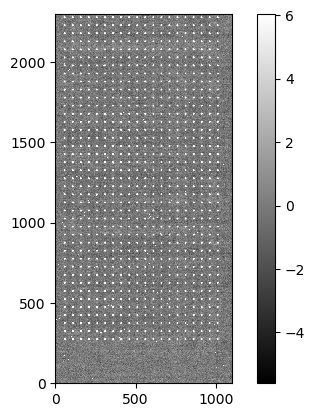

In [18]:
input_m, input_s = np.mean(input_data), np.std(input_data)
plt.imshow(
    input_data_new_order[:, 1400:],
    interpolation="nearest",
    cmap="gray",
    vmin=input_m - (2 * input_s),
    vmax=input_m + (2 * input_s),
    origin="lower",
)
plt.colorbar()
plt.savefig("Graphs/galaxy_illumination_CTI_free.png", dpi=500)

In [19]:
input_extract = sep.extract(
    input_data_new_order, thresh=4, segmentation_map=True, minarea=50
)
len(input_extract[0])

820

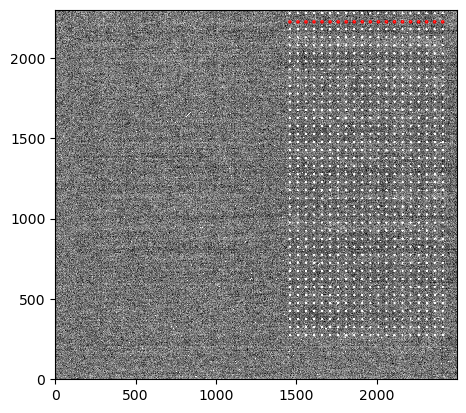

In [20]:
# plot background-subtracted image
j = 780
fig, ax = plt.subplots()
input_m, input_s = np.mean(input_data_new_order), np.std(input_data_new_order)
im = ax.imshow(
    input_data_new_order,
    interpolation="nearest",
    cmap="gray",
    vmin=input_m - input_s,
    vmax=input_m + input_s,
    origin="lower",
)

# plot an ellipse for each object
for i in range(20):
    e = Ellipse(
        xy=(input_extract[0]["x"][i + j], input_extract[0]["y"][i + j]),
        width=6 * input_extract[0]["a"][i + j],
        height=6 * input_extract[0]["b"][i + j],
        angle=input_extract[0]["theta"][i + j] * 180.0 / np.pi,
    )
    e.set_facecolor("none")
    e.set_edgecolor("red")
    ax.add_artist(e)

In [21]:
input_a, input_b, input_e = extract_a_b_and_elipticities(input_extract)

In [22]:
def get_corrected_elipticity_residuals(filepath, thresh, minarea):
    corrected_image = get_pkg_data_filename(filepath)
    corrected_data, corrected_tmp_hdr = fits.getdata(
        corrected_image, ext=0, header=True
    )
    corrected_data_new_order = corrected_data[:, 350:1450].byteswap().newbyteorder()
    corrected_extract = sep.extract(
        corrected_data_new_order, thresh=thresh, segmentation_map=True, minarea=minarea
    )
    corrected_a, corrected_b, corrected_e = extract_a_b_and_elipticities(
        corrected_extract
    )
    print(len(corrected_extract[0]))
    residuals_per_row = []
    for i in range(len(corrected_e)):
        tmp_residuals = abs(np.average(input_e[i]) - np.average(corrected_e[i]))
        residuals_per_row.append(tmp_residuals)
    return residuals_per_row

In [76]:
filepath = open_fits_as_file_list("../Results/2D/raw_images/", "")
filepath

('/usr/brad-data/profiles_and_fits/fits/corrected/lab/batch_7/3Trp_id1_open_beta_open_neg_wnd_open_fef_235_EPER_slow_capture_no_bias.fits',
 '/usr/brad-data/profiles_and_fits/fits/corrected/lab/batch_7/3Trp_id2_open_beta_open_neg_wnd_closed_fef_235_EPER_slow_capture_no_bias.fits')

In [44]:
save_corrected_fits_files_as_png(filepath, "batch_1")

In [45]:
residuals_per_row_batch1_id1 = get_corrected_elipticity_residuals(filepath[0], 7, 50)
# residuals_per_row_batch1_id2 = get_corrected_elipticity_residuals(filepath[1],10,50)

820
820


In [41]:
def save_corrected_fits_files_as_png(filepath, batch):
    for files in filepath:
        corrected_image = get_pkg_data_filename(files)
        save_name = files.split("/")[-1][:-5]
        corrected_data, corrected_tmp_hdr = fits.getdata(
            corrected_image, ext=0, header=True
        )
        corrected_data_new_order = corrected_data[:, 350:1450].byteswap().newbyteorder()
        fig, ax = plt.subplots()
        corrected_m, corrected_s = (
            np.mean(corrected_data_new_order),
            np.std(corrected_data_new_order),
        )
        im = ax.imshow(
            corrected_data_new_order,
            interpolation="nearest",
            cmap="gray",
            vmin=corrected_m - corrected_s,
            vmax=corrected_m + corrected_s,
            origin="lower",
        )
        plt.savefig(f"Graphs/{batch}/{save_name}_CROPPED.png", dpi=500)

        plt.close()

        corrected_data_new_order = corrected_data.byteswap().newbyteorder()
        fig, ax = plt.subplots()
        corrected_m, corrected_s = (
            np.mean(corrected_data_new_order),
            np.std(corrected_data_new_order),
        )
        im = ax.imshow(
            corrected_data_new_order,
            interpolation="nearest",
            cmap="gray",
            vmin=corrected_m - corrected_s,
            vmax=corrected_m + corrected_s,
            origin="lower",
        )
        plt.savefig(f"Graphs/{save_name}.png", dpi=200)

        plt.close()

In [24]:
corrected_image = get_pkg_data_filename(filepath[2])  # [6]
corrected_data, corrected_tmp_hdr = fits.getdata(corrected_image, ext=0, header=True)
corrected_data_new_order = corrected_data[:, 350:1450].byteswap().newbyteorder()
corrected_extract = sep.extract(
    corrected_data_new_order, thresh=5, segmentation_map=True, minarea=50
)

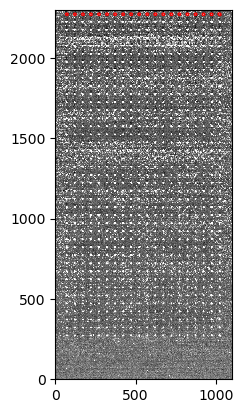

In [48]:
fig, ax = plt.subplots()
corrected_m, corrected_s = (
    np.mean(corrected_data_new_order),
    np.std(corrected_data_new_order),
)
im = ax.imshow(
    corrected_data_new_order,
    interpolation="nearest",
    cmap="gray",
    vmin=corrected_m - corrected_s,
    vmax=corrected_m + corrected_s,
    origin="lower",
)
for i in range(20):
    e = Ellipse(
        xy=(corrected_extract[0]["x"][i + j], corrected_extract[0]["y"][i + j]),
        width=6 * corrected_extract[0]["a"][i + j],
        height=6 * corrected_extract[0]["b"][i + j],
        angle=corrected_extract[0]["theta"][i + j] * 180.0 / np.pi,
    )
    e.set_facecolor("none")
    e.set_edgecolor("red")
    ax.add_artist(e)

In [119]:
# plot background-subtracted image
fig, ax = plt.subplots()
corrected_m, corrected_s = (
    np.mean(corrected_data_new_order),
    np.std(corrected_data_new_order),
)
im = ax.imshow(
    corrected_data_new_order,
    interpolation="nearest",
    cmap="gray",
    vmin=corrected_m - corrected_s,
    vmax=corrected_m + corrected_s,
    origin="lower",
)

# plot an ellipse for each object
for i in range(len(corrected_extract[0])):
    e = Ellipse(
        xy=(corrected_extract[0]["x"][i], corrected_extract[0]["y"][i]),
        width=6 * corrected_extract[0]["a"][i],
        height=6 * corrected_extract[0]["b"][i],
        angle=corrected_extract[0]["theta"][i] * 180.0 / np.pi,
    )
    e.set_facecolor("none")
    e.set_edgecolor("red")
    ax.add_artist(e)

In [120]:
corrected_a, corrected_b, corrected_e = extract_a_b_and_elipticities(corrected_extract)

In [121]:
residuals_per_row = []
for i in range(len(corrected_e)):
    tmp_residuals = abs(np.average(input_e[i]) - np.average(corrected_e[i]))
    residuals_per_row.append(tmp_residuals)

In [122]:
# residuals_per_row_batch5_id1 = residuals_per_row
# residuals_per_row_batch5_id2 = residuals_per_row
# residuals_per_row_batch5_id3 = residuals_per_row
# residuals_per_row_batch5_id4 = residuals_per_row
# residuals_per_row_batch5_id5 = residuals_per_row
# residuals_per_row_batch5_id6 = residuals_per_row

In [34]:
row_numbers = list(range(1, 42, 1))

In [57]:
plt.scatter(row_numbers, residuals_per_row_batch7_id1[::-1], label="1", marker="x")
plt.scatter(row_numbers, residuals_per_row_batch7_id2[::-1], label="2", marker="+")

plt.title("Ellipticity residuals")

plt.yscale("log")
plt.axhline(1.1e-4, linestyle="--", color="red", label="Euclid requirement")
plt.xlabel("Galaxy row number")
plt.ylabel("Ellipticity residuals")
plt.legend(title="Simulation number", bbox_to_anchor=[1, 1])
plt.savefig(
    "Graphs/ellipticity_residuals_vs_row_number_batch_6.png",
    dpi=150,
    bbox_inches="tight",
)